In [40]:
from boston_analytics_example import load_data_collection, get_public_request
import pandas as pd
import matplotlib
%matplotlib inline

sources = """
data_sources:
   MARoadwayEvents:
      url: "https://www.massdot.state.ma.us/feeds/MARoadwayEventsXML.aspx"
      authRequired: False
      responseType: 'xml'
   MassDotRTTMFeed:
      url: "https://www.massdot.state.ma.us/feeds/traveltimes/RTTM_feed.aspx"
      authRequired: False
      responseType: 'xml'
   BostonPoliceIncidents:
      url: "https://data.cityofboston.gov/resource/29yf-ye7n.json"
      authRequired: False
      responseType: 'json'
   VisionZeroResidentSubmissions:
      url: "http://bostonopendata.boston.opendata.arcgis.com/datasets/5bed19fc1f9cb41329adbafbd8ad260e5_0.geojson"
      authRequired: False
      responseType: 'json'
"""

sources = load_data_collection(sources)
source_content = []
for source in sources:
    if source.responseType == 'json':
        response = get_public_request(source)
        result = pd.read_json(response.content)
        source_content.append(result)

In [41]:
incidents = source_content[0]
incidents.head()

,:@computed_region_aywg_kpfh,day_of_week,district,hour,incident_number,lat,location,long,month,occurred_on_date,offense_code,offense_code_group,offense_description,reporting_area,shooting,street,ucr_part,year
0,10063.0,Wednesday,C6,8,I162083519,42.332850,"{'type': 'Point', 'coordinates': [-71.044172, ...",-71.044172,10,2016-10-12T08:01:00.000,2403,Disorderly Conduct,DISTURBING THE PEACE,220.0,NaN,G ST,Part Two,2016
1,10067.0,Sunday,E5,15,I162097035,42.293142,"{'type': 'Point', 'coordinates': [-71.122044, ...",-71.122044,11,2016-11-27T15:00:00.000,615,Larceny From Motor Vehicle,LARCENY THEFT OF MV PARTS & ACCESSORIES,564.0,NaN,ARCHDALE RD,Part One,2016
2,10058.0,Monday,B3,15,I162083378,42.302506,"{'type': 'Point', 'coordinates': [-71.083294, ...",-71.083294,10,2016-10-10T15:00:00.000,724,Auto Theft,AUTO THEFT,458.0,NaN,MICHIGAN AVE,Part One,2016
3,NaN,Monday,C6,23,I152066279,NaN,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,8,2015-08-10T23:47:00.000,301,Robbery,ROBBERY - STREET,214.0,NaN,NaN,Part One,2015
4,10056.0,Thursday,B2,6,I162081720,42.325699,"{'type': 'Point', 'coordinates': [-71.087905, ...",-71.087905,10,2016-10-06T06:50:00.000,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,299.0,NaN,CIRCUIT ST,Part Three,2016


In [43]:
day_of_week_offence_count = incidents\
    .groupby(['day_of_week']).size()

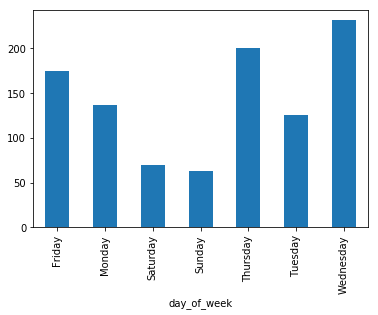

In [44]:
day_of_week_offence_count.plot(kind='bar')

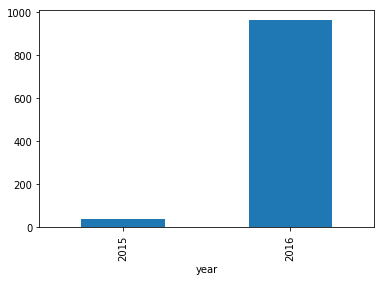

In [48]:
incidents.groupby('year')\
    .size()\
    .plot(kind='bar')